<a href="https://colab.research.google.com/github/SamuelMbogo/Colab_projects/blob/main/Hedera_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt


In [8]:
# Download historical data for HBAR-USD
hbar_data = yf.download("HBAR-USD", start="2022-11-27", end="2024-11-26", interval="1d")

# Preview the data
print(hbar_data.head())

[*********************100%***********************]  1 of 1 completed

Price                     Adj Close     Close      High       Low      Open  \
Ticker                     HBAR-USD  HBAR-USD  HBAR-USD  HBAR-USD  HBAR-USD   
Date                                                                          
2022-11-27 00:00:00+00:00  0.049163  0.049163  0.050903  0.049116  0.049428   
2022-11-28 00:00:00+00:00  0.048506  0.048506  0.049428  0.047450  0.049163   
2022-11-29 00:00:00+00:00  0.049391  0.049391  0.049554  0.048129  0.048501   
2022-11-30 00:00:00+00:00  0.050690  0.050690  0.050755  0.049290  0.049393   
2022-12-01 00:00:00+00:00  0.049152  0.049152  0.050693  0.048849  0.050693   

Price                        Volume  
Ticker                     HBAR-USD  
Date                                 
2022-11-27 00:00:00+00:00   9776288  
2022-11-28 00:00:00+00:00  17770507  
2022-11-29 00:00:00+00:00  11098035  
2022-11-30 00:00:00+00:00  12079901  
2022-12-01 00:00:00+00:00  13256399  


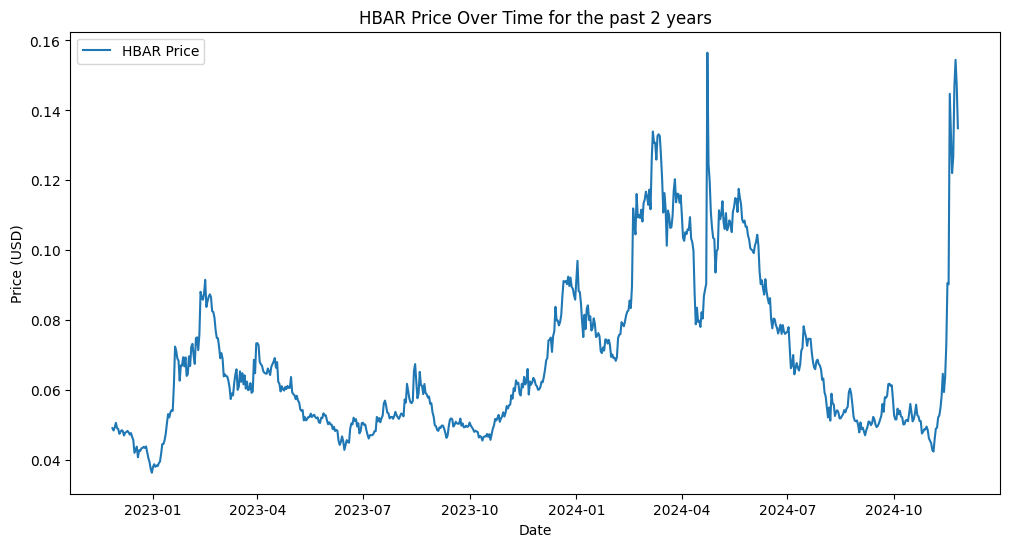

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(hbar_data.index, hbar_data['Close'], label="HBAR Price")
plt.title("HBAR Price Over Time for the past 2 years")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()


In [14]:
#importing hourly prices for the past 2 years(January 2023 to 27th November 2024)

import pandas as pd

def download_hourly_data(ticker, start_date, end_date):
    chunks = []
    current_start = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)
    max_days = 730  # Yahoo Finance limit for hourly data

    while current_start < end_date:
        current_end = min(current_start + pd.Timedelta(days=max_days), end_date)
        print(f"Downloading {current_start} to {current_end}")
        try:
            chunk = yf.download(
                ticker,
                start=current_start.strftime("%Y-%m-%d"),
                end=current_end.strftime("%Y-%m-%d"),
                interval="1h"
            )
            chunks.append(chunk)
        except Exception as e:
            print(f"Error downloading {current_start} to {current_end}: {e}")
        current_start = current_end

    # Combine all chunks
    if chunks:
        return pd.concat(chunks)
    else:
        return pd.DataFrame()

# Download data in chunks
hbar_hourly = download_hourly_data("HBAR-USD", "2023-01-01", "2024-11-27")

# Preview the data
print(hbar_hourly.head())


[*********************100%***********************]  1 of 1 completed

Price                     Adj Close     Close      High       Low      Open  \
Ticker                     HBAR-USD  HBAR-USD  HBAR-USD  HBAR-USD  HBAR-USD   
Datetime                                                                      
2023-01-01 00:00:00+00:00  0.036373  0.036373  0.036483  0.036363  0.036430   
2023-01-01 01:00:00+00:00  0.036366  0.036366  0.036450  0.036338  0.036363   
2023-01-01 02:00:00+00:00  0.036494  0.036494  0.036527  0.036366  0.036366   
2023-01-01 03:00:00+00:00  0.036621  0.036621  0.036623  0.036489  0.036492   
2023-01-01 04:00:00+00:00  0.036576  0.036576  0.036639  0.036484  0.036622   

Price                       Volume  
Ticker                    HBAR-USD  
Datetime                            
2023-01-01 00:00:00+00:00        0  
2023-01-01 01:00:00+00:00        0  
2023-01-01 02:00:00+00:00    34014  
2023-01-01 03:00:00+00:00        0  
2023-01-01 04:00:00+00:00        0  


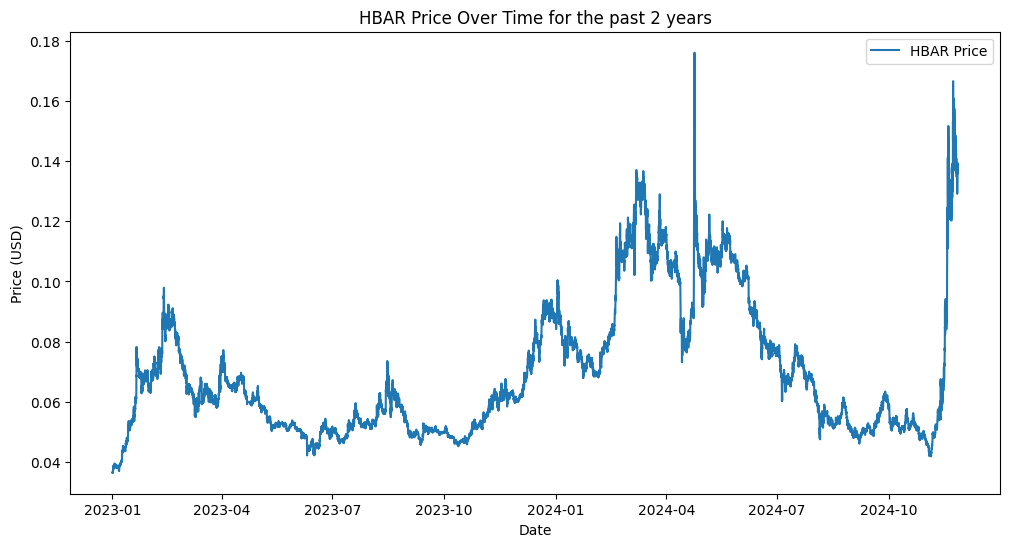

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(hbar_hourly.index, hbar_hourly['Close'], label="HBAR Price")
plt.title("HBAR Price Over Time for the past 2 years")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

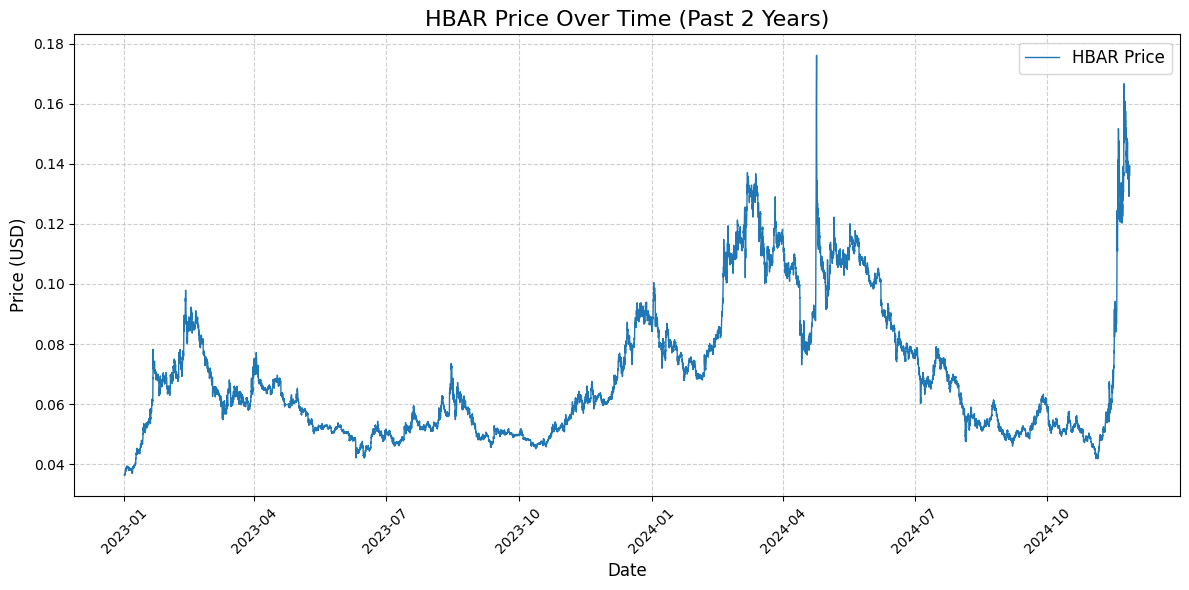

In [17]:
#improved version of the above chart

import matplotlib.pyplot as plt

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(hbar_hourly.index, hbar_hourly['Close'], label="HBAR Price", linewidth=1)

# Customize the chart
plt.title("HBAR Price Over Time (Past 2 Years)", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price (USD)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)

# Format the x-axis for readability
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


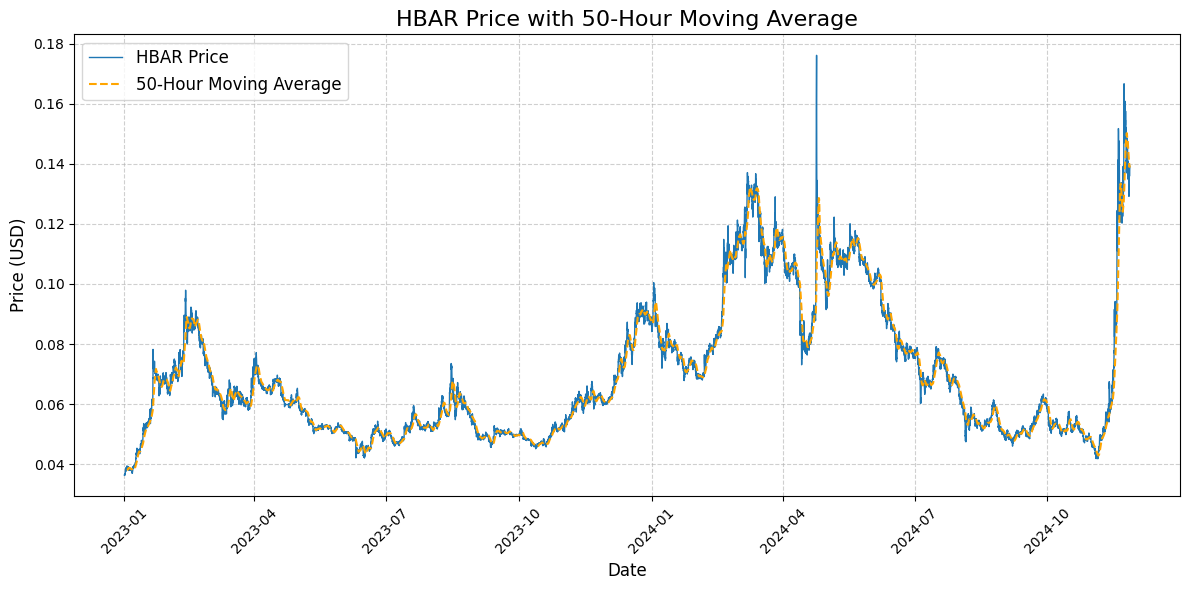

In [18]:
# Adding a 50 hour moving average

# Add a moving average to the data
hbar_hourly['50h_MA'] = hbar_hourly['Close'].rolling(window=50).mean()

# Re-plot with moving average
plt.figure(figsize=(12, 6))
plt.plot(hbar_hourly.index, hbar_hourly['Close'], label="HBAR Price", linewidth=1)
plt.plot(hbar_hourly.index, hbar_hourly['50h_MA'], label="50-Hour Moving Average", linestyle='--', color='orange')

# Chart details
plt.title("HBAR Price with 50-Hour Moving Average", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price (USD)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


To analyze all the Friday movements side by side, we will extract data for Fridays, plot each Friday's hourly movement separately, and display them in a grid of subplots for comparison.

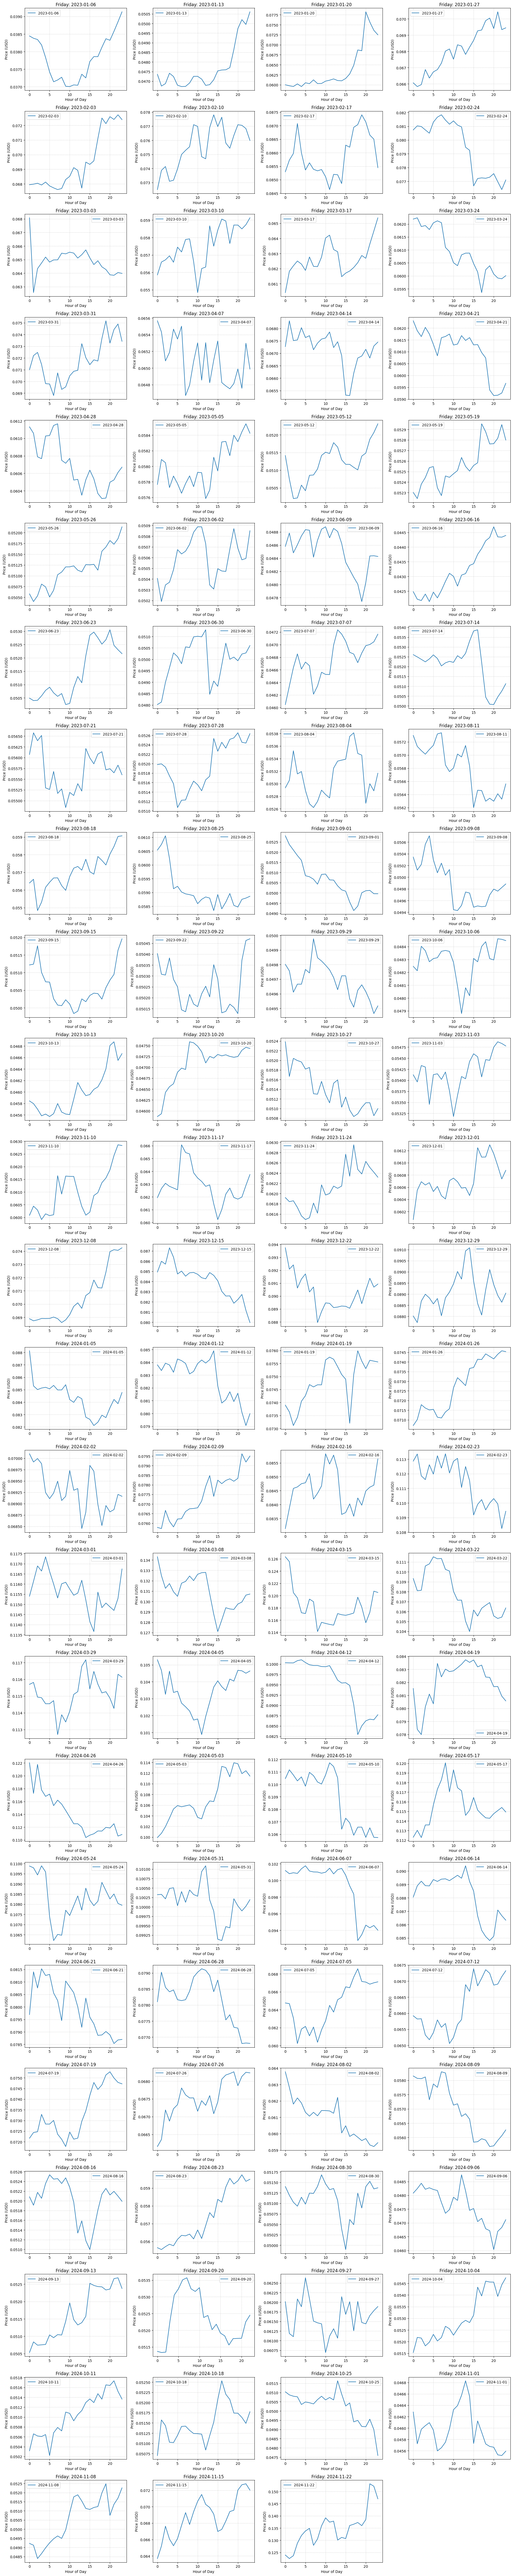

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure datetime index
hbar_hourly.index = pd.to_datetime(hbar_hourly.index)

# Filter only Fridays
friday_data = hbar_hourly[hbar_hourly.index.dayofweek == 4]  # Day of week: Monday=0, Friday=4

# Group by each Friday
friday_groups = friday_data.groupby(friday_data.index.date)

# Plot all Fridays in subplots
num_fridays = len(friday_groups)
rows = (num_fridays // 4) + 1  # 4 charts per row
fig, axes = plt.subplots(rows, 4, figsize=(20, rows * 4))
axes = axes.flatten()

for i, (friday, data) in enumerate(friday_groups):
    ax = axes[i]
    ax.plot(data.index.hour + data.index.minute / 60, data['Close'], label=str(friday))
    ax.set_title(f"Friday: {friday}")
    ax.set_xlabel("Hour of Day")
    ax.set_ylabel("Price (USD)")
    ax.grid(True, linestyle="--", alpha=0.5)
    ax.legend()

# Hide unused axes
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


**Detect Seasonal or Repeating Patterns**

Analyze whether certain Fridays show recurring patterns:

Check for seasonality using autocorrelation.

Identify high-activity hours.

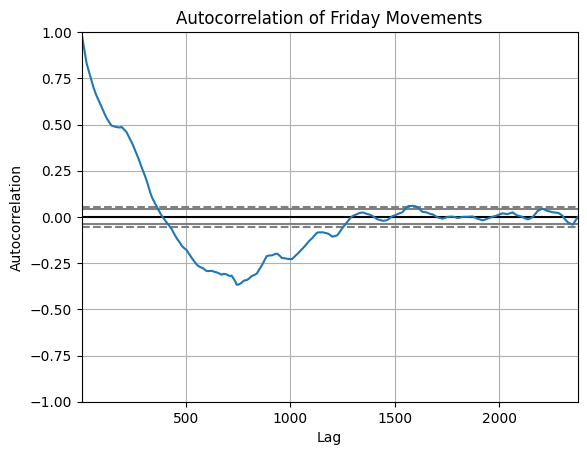

In [24]:
# Calculate autocorrelation for Friday closing prices
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(friday_data['Close'])
plt.title("Autocorrelation of Friday Movements")
plt.show()


**Observations**:

1. **Initial Positive Autocorrelation**: The autocorrelation starts with a high positive value at lag 0 (which is always 1, representing the correlation of a data point with itself). This is expected and doesn't provide much information.

2. **Gradual Decay**: As the lag increases, the autocorrelation gradually decreases but stays positive for a considerable number of lags. This suggests some level of persistence or "memory" in the Friday closing prices. It means that past Friday prices do have some influence on future Friday prices, but this influence weakens over time.

3. **No Significant Peaks**: There aren't any very prominent and sharp peaks (other than the initial one at lag 0). This indicates a lack of strong seasonality or very regular cyclical patterns in the weekly closing prices. If there were strong weekly seasonality, we'd expect to see a significant peak at lag 1, lag 2, and so on.

4. **Confidence Bands**: The blue shaded area represents the confidence interval. Any autocorrelation values falling within this band are considered statistically insignificant, meaning they could be due to random chance.

**Insights**

1. **Short-Term Dependence**: The positive autocorrelation, especially at smaller lags, suggests that recent Friday closing prices are somewhat predictive of near-future Friday closing prices. There's a short-term dependence in the data.

2. **No Strong Weekly Seasonality**: The absence of strong, repeating peaks outside the confidence interval indicates that there isn't a very pronounced weekly pattern or seasonality in the HBAR-USD closing prices on Fridays.

3. **Gradual Price Reversion**: The gradual decay of the autocorrelation towards zero implies a tendency for the prices to revert towards their mean over time, although this process is not very rapid.

**Conclusions**

1. **Limited Predictability**: While there's some short-term dependence, the lack of strong seasonality suggests that predicting future Friday closing prices solely based on past Friday closing prices is likely to be challenging. Other factors are likely at play.

2. **Potential for Short-Term Strategies**: Traders might be able to exploit the short-term dependence for very short-term strategies, but longer-term predictions based on weekly patterns would be less reliable.

3. **Further Analysis**: To gain deeper insights, it would be beneficial to:

Explore other factors that might influence HBAR-USD prices.

*   Consider different time periods or data frequencies (e.g., daily data).
*   Investigate other statistical measures and models.
*   Analyze price changes or returns instead of just closing prices.
